In [69]:
import numpy as np
from scipy.interpolate import UnivariateSpline, SmoothBivariateSpline, griddata,splprep, splev

import matplotlib.pyplot as plt


In [50]:
# python lists of x,y dst control points and zx=xsrc-xdiff, zy=ysrc-ydiff offsets to be interpolated over full image of size 129x129
#x = [8.5, 20.5, 33.5, 48.5, 64.5, 80.5, 95.5, 109.5, 121.5, 5.5, 17.5, 31.5, 46.5, 64.5, 81.5, 97.5, 111.5, 123.5, 2.5, 14.5, 29.5, 45.5, 64.5, 83.5, 99.5, 113.5, 125.5, 1.5, 12.5, 26.5, 43.5, 64.5, 85.5, 103.5, 116.5, 127.5, 0.5, 11.5, 24.5, 41.5, 64.5, 87.5, 103.5, 117.5, 128.5, 1.5, 12.5, 25.5, 42.5, 64.5, 86.5, 103.5, 116.5, 127.5, 2.5, 14.5, 28.5, 45.5, 64.5, 83.5, 100.5, 114.5, 125.5, 5.5, 17.5, 30.5, 46.5, 64.5, 81.5, 97.5, 111.5, 123.5, 8.5, 19.5, 33.5, 48.5, 64.5, 80.5, 95.5, 109.5, 121.5]
#y = [7.5, 5.5, 3.5, 1.5, 1.5, 1.5, 3.5, 5.5, 7.5, 20.5, 16.5, 14.5, 12.5, 11.5, 12.5, 15.5, 16.5, 19.5, 33.5, 31.5, 28.5, 26.5, 24.5, 26.5, 28.5, 31.5, 33.5, 48.5, 47.5, 45.5, 42.5, 40.5, 42.5, 45.5, 46.5, 48.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 80.5, 81.5, 83.5, 86.5, 87.5, 86.5, 83.5, 81.5, 80.5, 95.5, 97.5, 100.5, 103.5, 104.5, 102.5, 100.5, 97.5, 95.5, 109.5, 111.5, 114.5, 116.5, 117.5, 116.5, 114.5, 111.5, 109.5, 121.5, 123.5, 125.5, 127.5, 127.5, 127.5, 125.5, 123.5, 120.5]
#zx = [119.5, 123.5, 126.5, 127.5, 127.5, 127.5, 128.5, 130.5, 134.5, 122.5, 126.5, 128.5, 129.5, 127.5, 126.5, 126.5, 128.5, 132.5, 125.5, 129.5, 130.5, 130.5, 127.5, 124.5, 124.5, 126.5, 130.5, 126.5, 131.5, 133.5, 132.5, 127.5, 122.5, 120.5, 123.5, 128.5, 127.5, 132.5, 135.5, 134.5, 127.5, 120.5, 120.5, 122.5, 127.5, 126.5, 131.5, 134.5, 133.5, 127.5, 121.5, 120.5, 123.5, 128.5, 125.5, 129.5, 131.5, 130.5, 127.5, 124.5, 123.5, 125.5, 130.5, 122.5, 126.5, 129.5, 129.5, 127.5, 126.5, 126.5, 128.5, 132.5, 119.5, 124.5, 126.5, 127.5, 127.5, 127.5, 128.5, 130.5, 134.5]
#zy = [120.5, 122.5, 124.5, 126.5, 126.5, 126.5, 124.5, 122.5, 120.5, 123.5, 127.5, 129.5, 131.5, 132.5, 131.5, 128.5, 127.5, 124.5, 126.5, 128.5, 131.5, 133.5, 135.5, 133.5, 131.5, 128.5, 126.5, 127.5, 128.5, 130.5, 133.5, 135.5, 133.5, 130.5, 129.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 126.5, 124.5, 121.5, 120.5, 121.5, 124.5, 126.5, 127.5, 128.5, 126.5, 123.5, 120.5, 119.5, 121.5, 123.5, 126.5, 128.5, 130.5, 128.5, 125.5, 123.5, 122.5, 123.5, 125.5, 128.5, 130.5, 134.5, 132.5, 130.5, 128.5, 128.5, 128.5, 130.5, 132.5, 135.5]

x = [40000,40100,40200, 39000, 40100, 40400, 40000,40100,40200, 41000,41100,41200, 31000,31100,31200,40000,40100,40200, 39000, 40100, 40400, 40000,40100,40200, 41000,41100,41200, 31000,31100,31200]
y = [10000, 9000, 10000, 10100, 8000, 10100, 10000, 9000, 10000, 11000, 9100, 11000, 8000, 8100, 8000,10000, 9000, 10000, 10100, 8000, 10100, 10000, 9000, 10000, 11000, 9100, 11000, 8000, 8100, 8000]
z = [100, 100, 100, 101, 101, 101, 102, 102, 102, 103, 103, 103,104,104,104,105,105,105,106,106,106,107,107,107, 108,108,108,109,109,109]
print(len(x), len(z))
# convert python lists to numpy arrays
ax = np.asarray(x)
ay = np.asarray(y)
az = np.asarray(z)
# define bbox of interpolated data
minx = min(x)
maxx = max(x)
miny = min(y)
maxy = max(y)
bbox=[minx, maxx, miny, maxy]
# convert bbox to numpy array
abbox = np.asarray(bbox)
# do interpolations
#xd = SmoothBivariateSpline(ax, ay, az, w=None, bbox=abbox, kx=2, ky=2)
xd = SmoothBivariateSpline(ax, ay, az, s=3, kx=1, ky=1)
#interp_func = SmoothBivariateSpline(ax, ay, azx, s=0.1)

30 30


In [75]:
pts = np.array([x,y]).reshape(30,2)
pts.shape

(30, 2)

In [67]:
grid_x, grid_y = np.mgrid[0:1:10j, 0:1:10j]
values = points
points.shape

(3, 30)

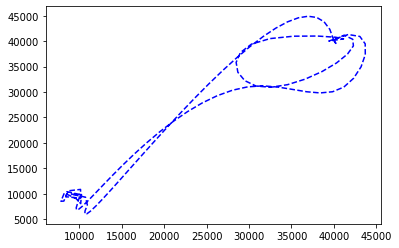

In [83]:
new_len = 100
tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
u_new = np.linspace(u.min(), u.max(), new_len)
x_new, y_new = splev(u_new, tck, der=0)

#plt.plot(pts[:,0], pts[:,1], 'ro')
plt.plot(x_new, y_new, 'b--')
plt.show()

In [84]:
print(x_new.shape)
print(y_new.shape)
new_pts = np.array([x_new,y_new]).reshape(new_len, 2)
print(new_pts.shape)

(100,)
(100,)
(100, 2)
